In [1]:
import os
import pandas as pd

label_dir = "airplane/labels/train"

boxes = []

for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        with open(os.path.join(label_dir, file), "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    cls, xc, yc, w, h = map(float, parts)
                    boxes.append([w, h])

df = pd.DataFrame(boxes, columns=["width", "height"])
df["aspect_ratio"] = df["height"] / df["width"]
df.head()


,width,height,aspect_ratio
0,0.112206,0.156351,1.393423
1,0.056519,0.121309,2.146347
2,0.051846,0.111035,2.141636
3,0.093490,0.152775,1.634137
4,0.066907,0.124895,1.866697


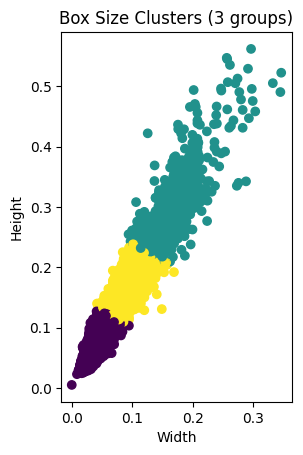

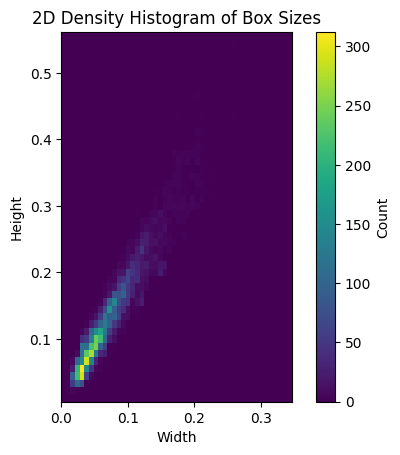

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['width', 'height']])
df.head()

plt.scatter(df["width"], df["height"], c=df["cluster"])
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Box Size Clusters (3 groups)")
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

plt.hist2d(df["width"], df["height"], bins=50)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("2D Density Histogram of Box Sizes")
plt.colorbar(label="Count")

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [8]:
from data_loading import get_dataset

dataset = get_dataset("airplane/images/train",8)


In [9]:
from network import Net


network = Net()
for i in dataset:
    logits = network(i)
    print(logits.shape)
    break


/home/user/.local/lib/python3.12/site-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'net_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


tf.Tensor(
[[[[0.00000000e+00 0.00000000e+00 2.95033300e-04 ... 2.57476873e-04
    7.76377390e-04 8.48158146e-04]
   [0.00000000e+00 0.00000000e+00 2.19076348e-04 ... 1.40085773e-04
    7.91676110e-04 8.59997410e-04]
   [0.00000000e+00 0.00000000e+00 2.11555744e-04 ... 2.04657146e-04
    1.01489155e-03 9.87421139e-04]
   ...
   [0.00000000e+00 0.00000000e+00 4.57229326e-04 ... 1.23641788e-04
    8.08217854e-04 4.28655942e-04]
   [0.00000000e+00 0.00000000e+00 2.32613704e-04 ... 4.42019751e-04
    7.03188358e-04 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.95485474e-05
    1.63102741e-04 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 3.27336107e-04 ... 2.67627998e-04
    6.89025503e-04 8.55782710e-04]
   [0.00000000e+00 0.00000000e+00 1.92447653e-04 ... 1.92342181e-04
    8.11341044e-04 1.08218589e-03]
   [0.00000000e+00 0.00000000e+00 2.72222533e-04 ... 1.26465748e-04
    1.04849052e-03 1.07264111e-03]
   ...
   [0.00000000e+00 0.00000000e+00 5.03474730e-